In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/survey lung cancer.csv')
df.head()
# 1: True
# 2: False

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.shape

(309, 16)

In [4]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [6]:
df.GENDER.value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

In [7]:
df.LUNG_CANCER.value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

In [8]:
x = df.values[:, :-1]

array([['M', 69, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 'YES'],
       ['M', 74, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 'YES'],
       ['F', 59, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 'NO'],
       ['M', 63, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 'NO'],
       ['F', 63, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 'NO']],
      dtype=object)

In [16]:
x = df.values[:, :-1]
y = df.values[:, -1]

In [12]:
from sklearn import preprocessing

In [17]:
label_GENDER = preprocessing.LabelEncoder().fit(['M', 'F'])
x[:, 0] = label_GENDER.transform(x[:, 0])
x[:5]

array([[1, 69, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2],
       [1, 74, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2],
       [0, 59, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2],
       [1, 63, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2],
       [0, 63, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1]], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=5)

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
y_pred = model.predict(x_test)
print(y_test[:10])
print(y_pred[:10])

['YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES']
['YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES']


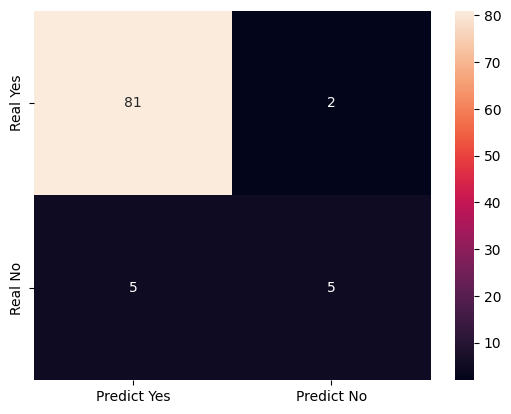

In [24]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred, labels=['YES', 'NO'])
confusion_df = pd.DataFrame(confusion,
                           index=['Real Yes', 'Real No'],
                           columns=['Predict Yes', 'Predict No'])
sns.heatmap(confusion_df, annot=True)
plt.show()


https://www.kaggle.com/datasets/sujithmandala/marketing-campaign-positive-response-prediction